In [12]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression 
import math


pd.set_option('display.max_columns', None)
%matplotlib inline 

housing = pd.read_csv('./data/Ames_Housing_Price_Data.csv', index_col=0)
housing.shape

(2580, 81)

In [13]:
housing.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [15]:
numerical_columns = housing.select_dtypes('int64','float64')

array([[<Axes: title={'center': 'PID'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'SalePrice'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotArea'}>],
       [<Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': '1stFlrSF'}>],
       [<Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>],
       [<Axes: title={'center': 'KitchenAbvGr'}>,
        <Axes: title={'center': 'TotRmsAbvGrd'}>,
        <Axes: title={'center': 'Fireplaces'}>,
        <Axes: title={'center': 'WoodDeckSF'}>,
        <Axes: title={'center': 'OpenPorchSF'}>],
       [<Axes: title={'center': 'EnclosedPor

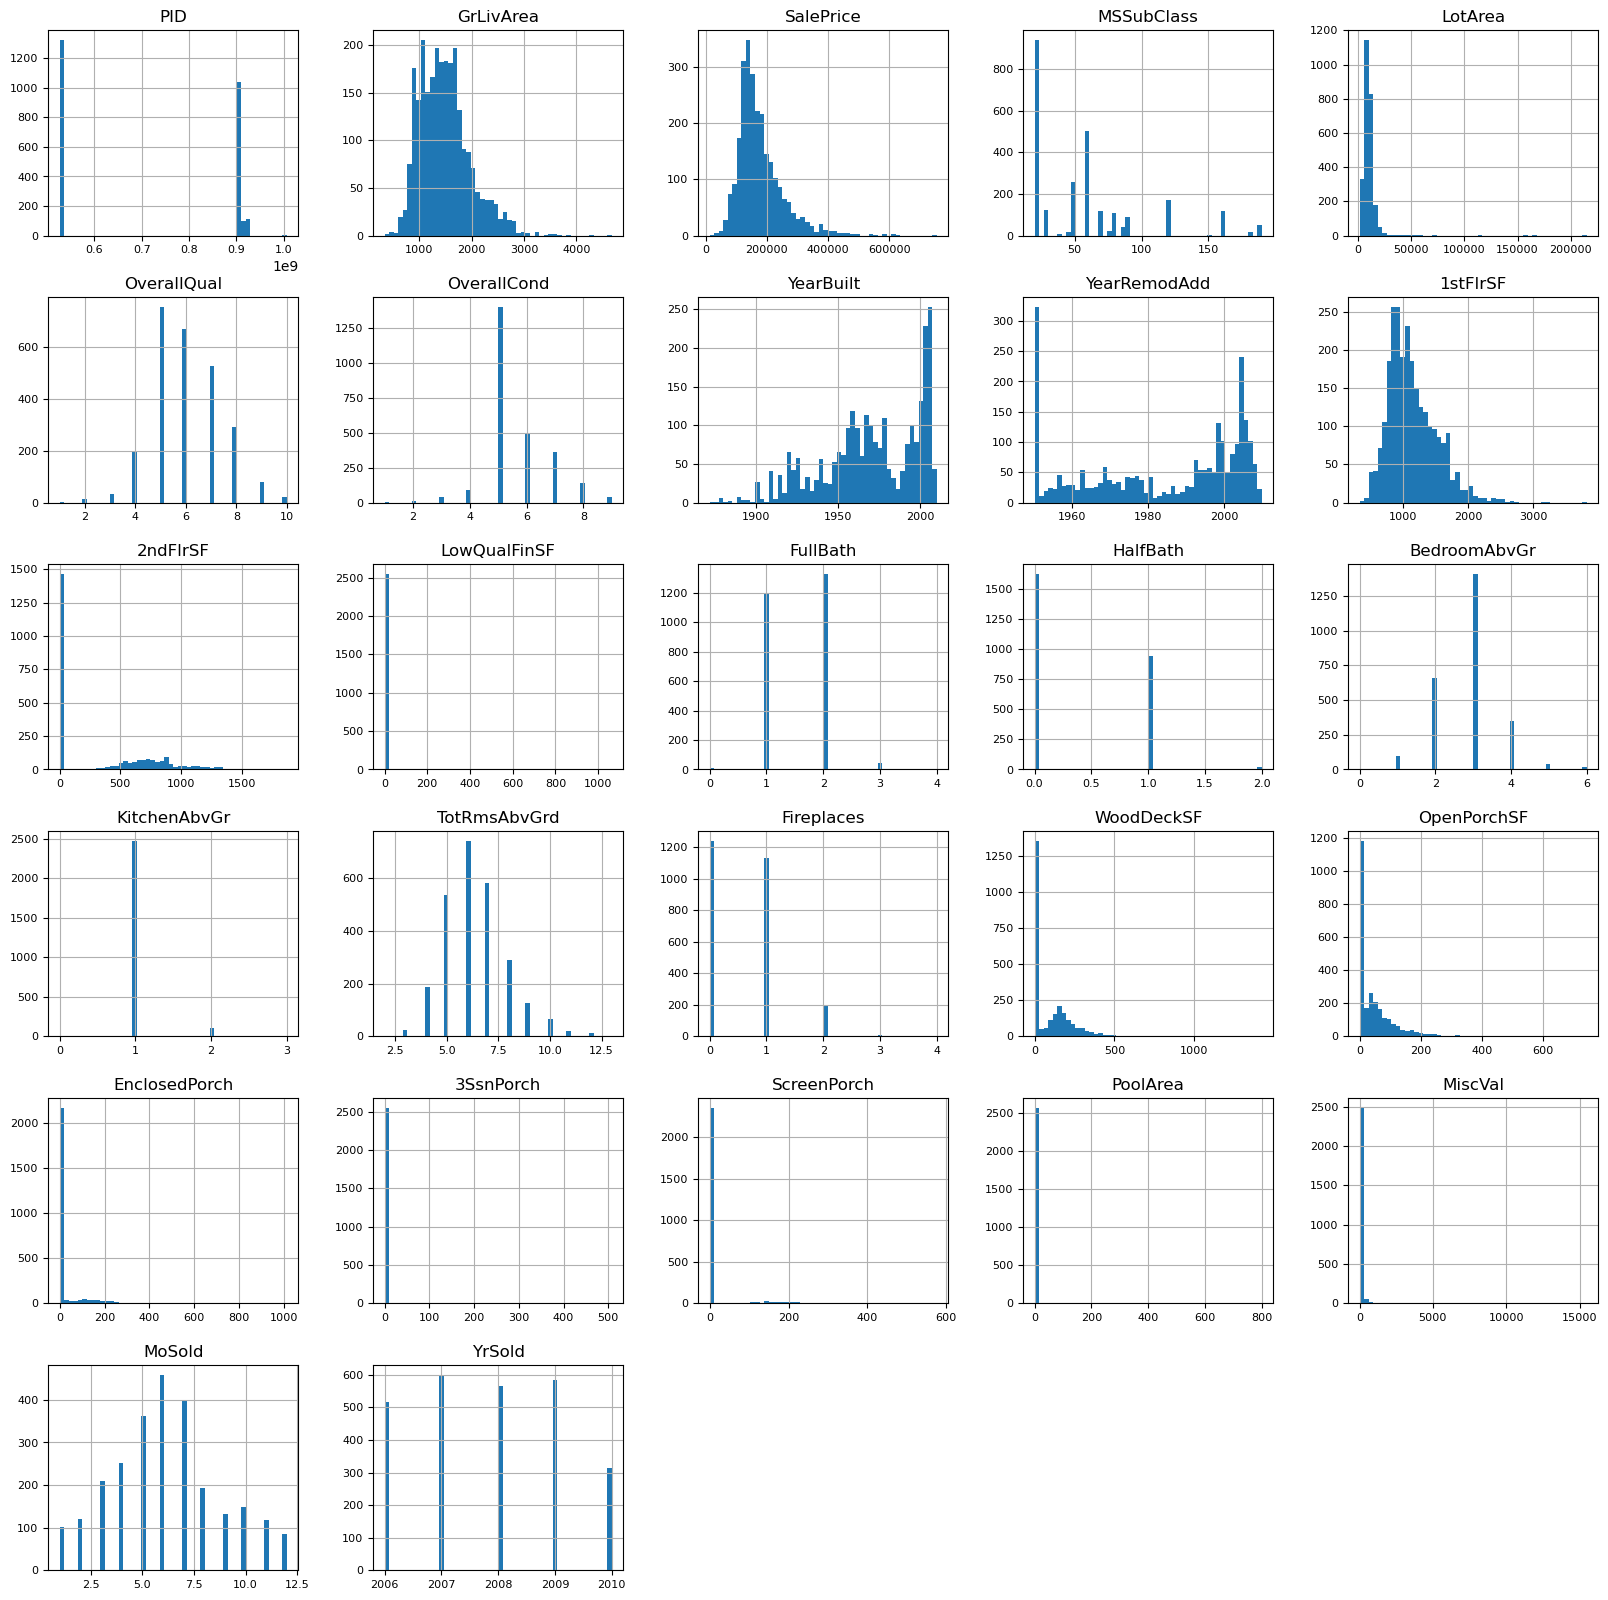

In [16]:
numerical_columns.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [44]:
numerical_columns.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [57]:
cont_num_cols = numerical_columns.drop(['SalePrice','PID','MoSold','MSSubClass','YrSold','FullBath','Fireplaces','OverallQual','OverallCond','HalfBath','TotRmsAbvGrd','BedroomAbvGr','KitchenAbvGr'],axis=1)
cont_num_cols

,GrLivArea,LotArea,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
1,856,7890,1939,1950,856,0,0,0,0,0,0,166,0,0
2,1049,4235,1984,1984,1049,0,0,0,105,0,0,0,0,0
3,1001,6060,1930,2007,1001,0,0,154,0,42,86,0,0,0
4,1039,8146,1900,2003,717,322,0,0,0,168,0,111,0,0
5,1665,8400,2001,2001,810,855,0,0,45,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,952,8854,1916,1950,952,0,0,0,98,0,0,40,0,0
760,1733,13680,1955,1955,1733,0,0,0,0,0,0,0,0,0
761,2002,6270,1949,1950,1001,1001,0,0,0,0,0,0,0,0
762,1842,8826,2000,2000,985,857,0,193,96,0,0,0,0,0


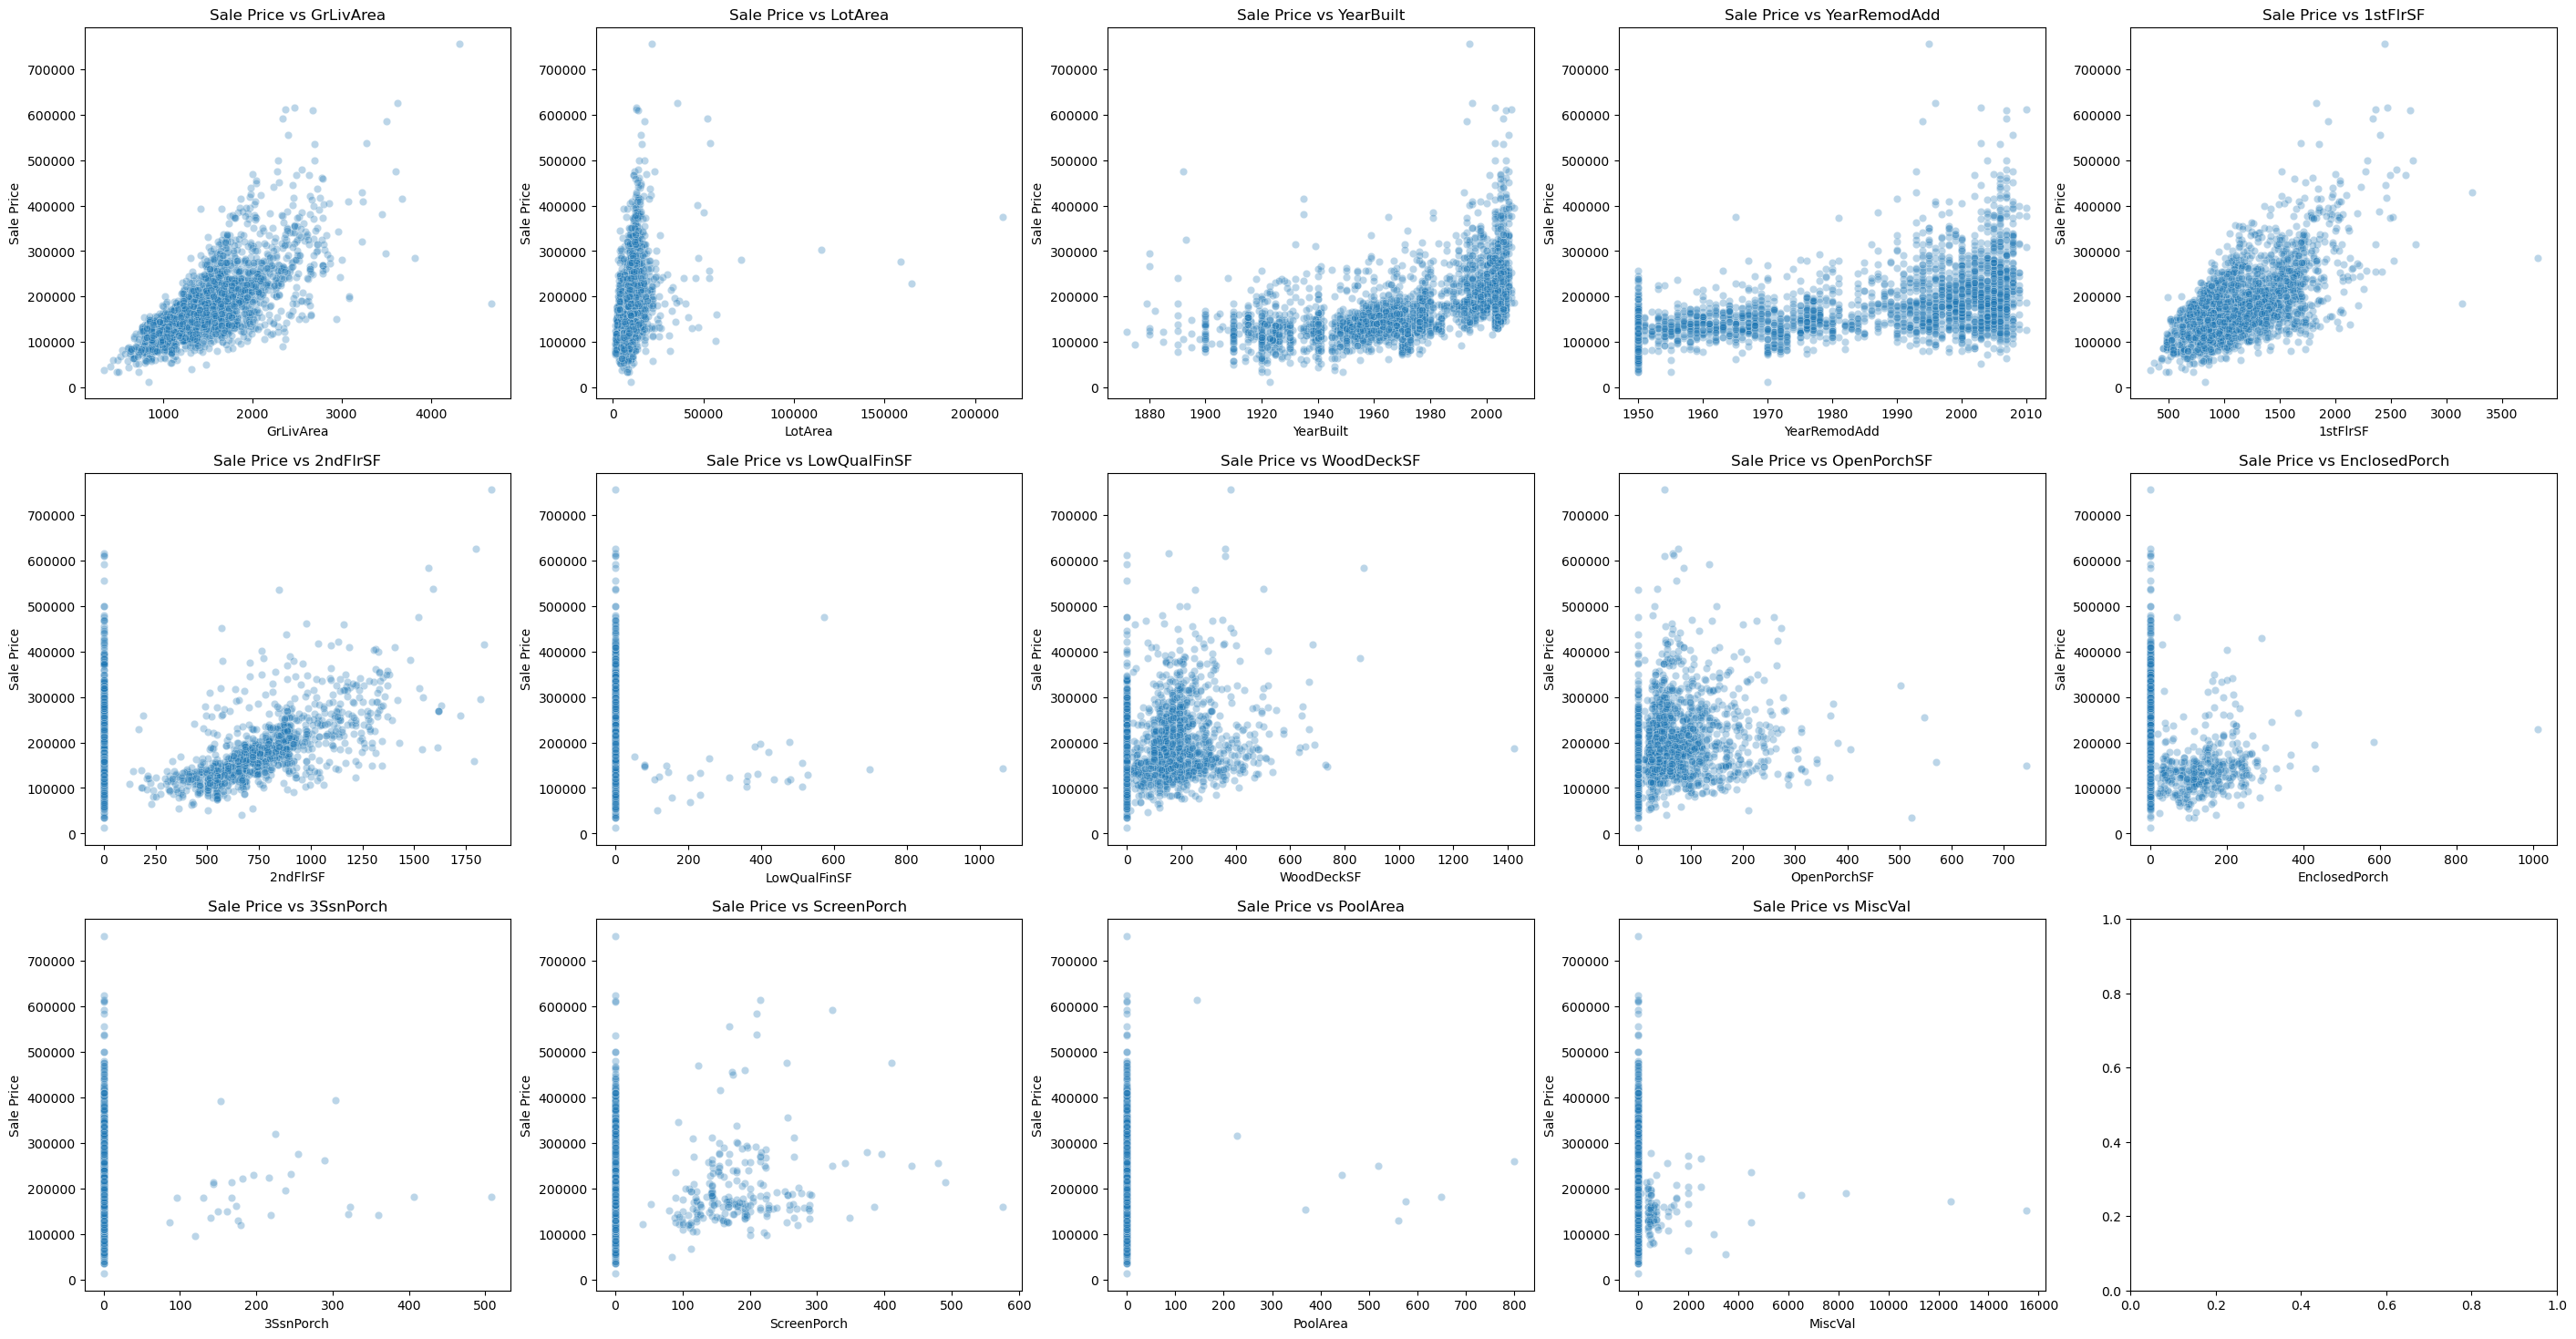

In [58]:
n_cols = 5
n_rows = math.ceil(len(cont_num_cols.columns) / n_cols)
n_rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 7, n_rows * 6))
axes = axes.flatten()
for i, column in enumerate(cont_num_cols.columns):
    sns.scatterplot(data=numerical_columns, x=column, y='SalePrice', ax=axes[i], alpha = 0.3)
    axes[i].set_title(f'Sale Price vs {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Sale Price')

In [53]:
discrete_num_cols = numerical_columns[['SalePrice','PID','MoSold','MSSubClass','YrSold','FullBath','Fireplaces','OverallQual','OverallCond','HalfBath','TotRmsAbvGrd','BedroomAbvGr','KitchenAbvGr']]
discrete_num_cols

,SalePrice,PID,MoSold,MSSubClass,YrSold,FullBath,Fireplaces,OverallQual,OverallCond,HalfBath,TotRmsAbvGrd,BedroomAbvGr,KitchenAbvGr
1,126000,909176150,3,30,2010,1,1,6,6,0,4,2,1
2,139500,905476230,2,120,2009,2,0,5,5,0,5,2,1
3,124900,911128020,11,30,2007,1,0,5,9,0,5,2,1
4,114000,535377150,5,70,2009,1,0,4,8,0,6,2,1
5,227000,534177230,11,60,2009,2,0,8,6,1,6,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,121000,903205040,5,30,2009,1,1,6,6,0,4,2,1
760,139600,905402060,6,20,2009,2,1,3,5,0,8,4,1
761,145000,909275030,8,90,2007,2,0,5,6,0,8,4,2
762,217500,907192040,7,60,2007,2,1,7,5,1,7,3,1


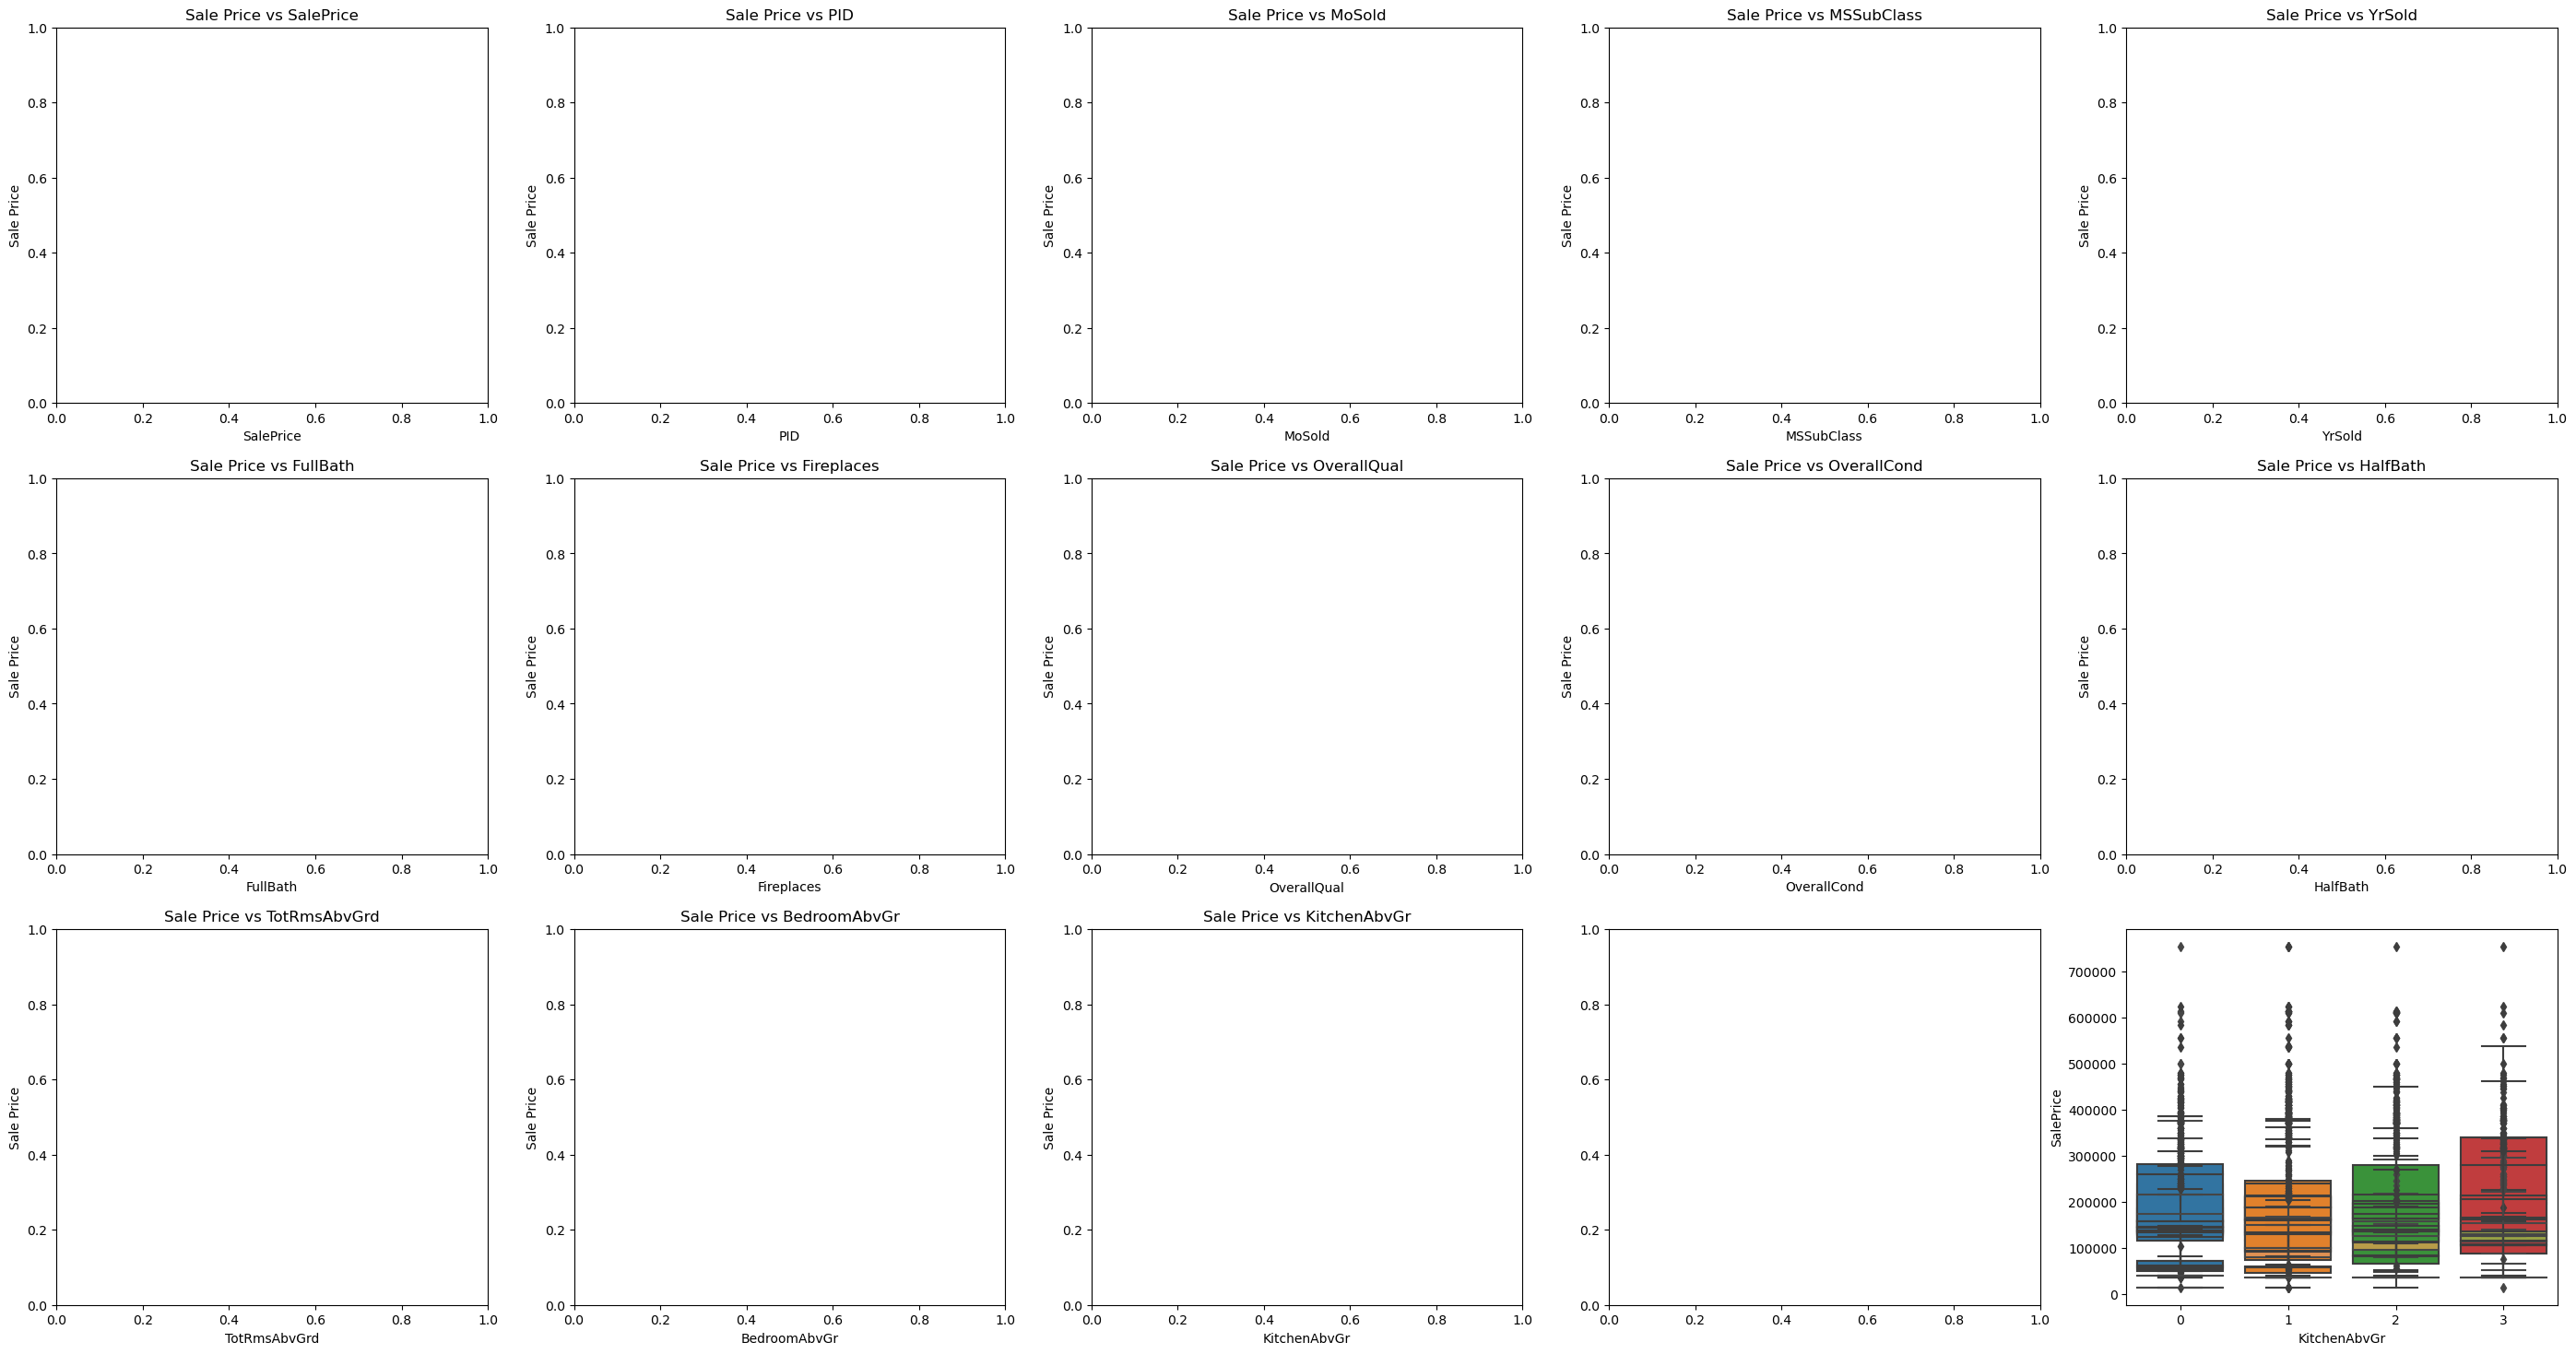

In [59]:
n_cols = 5
n_rows = math.ceil(len(discrete_num_cols.columns) / n_cols)
n_rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 7, n_rows * 6))
axes = axes.flatten()
for i, column in enumerate(discrete_num_cols.columns):
    sns.boxplot(data=numerical_columns, x=column, y='SalePrice')
    axes[i].set_title(f'Sale Price vs {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Sale Price')

In [19]:
housing_num_cat = housing_num[['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','YrSold']]

In [26]:
exclude_columns = ['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','YrSold']
selected_columns = [col for col in housing_num.columns if col not in exclude_columns]
df_num = housing_num[selected_columns]
df_num

,PID,GrLivArea,SalePrice,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
1,909176150,856,126000,NaN,7890,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1939.0,399.0,0,0,0,0,166,0,0
2,905476230,1049,139500,42.0,4235,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1984.0,266.0,0,105,0,0,0,0,0
3,911128020,1001,124900,60.0,6060,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,1930.0,216.0,154,0,42,86,0,0,0
4,535377150,1039,114000,80.0,8146,1900,2003,0.0,0.0,0.0,405.0,405.0,717,322,0,1940.0,281.0,0,0,168,0,111,0,0
5,534177230,1665,227000,70.0,8400,2001,2001,0.0,643.0,0.0,167.0,810.0,810,855,0,2001.0,528.0,0,45,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,952,121000,NaN,8854,1916,1950,0.0,0.0,0.0,952.0,952.0,952,0,0,1916.0,192.0,0,98,0,0,40,0,0
760,905402060,1733,139600,NaN,13680,1955,1955,0.0,0.0,0.0,0.0,0.0,1733,0,0,1955.0,452.0,0,0,0,0,0,0,0
761,909275030,2002,145000,82.0,6270,1949,1950,0.0,284.0,0.0,717.0,1001.0,1001,1001,0,1949.0,871.0,0,0,0,0,0,0,0
762,907192040,1842,217500,NaN,8826,2000,2000,144.0,841.0,0.0,144.0,985.0,985,857,0,2000.0,486.0,193,96,0,0,0,0,0


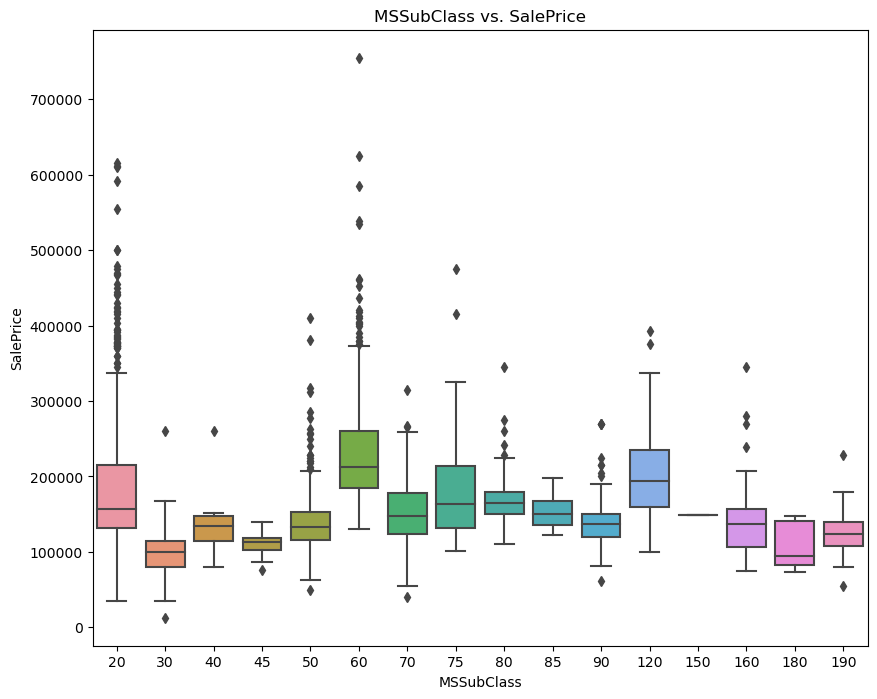

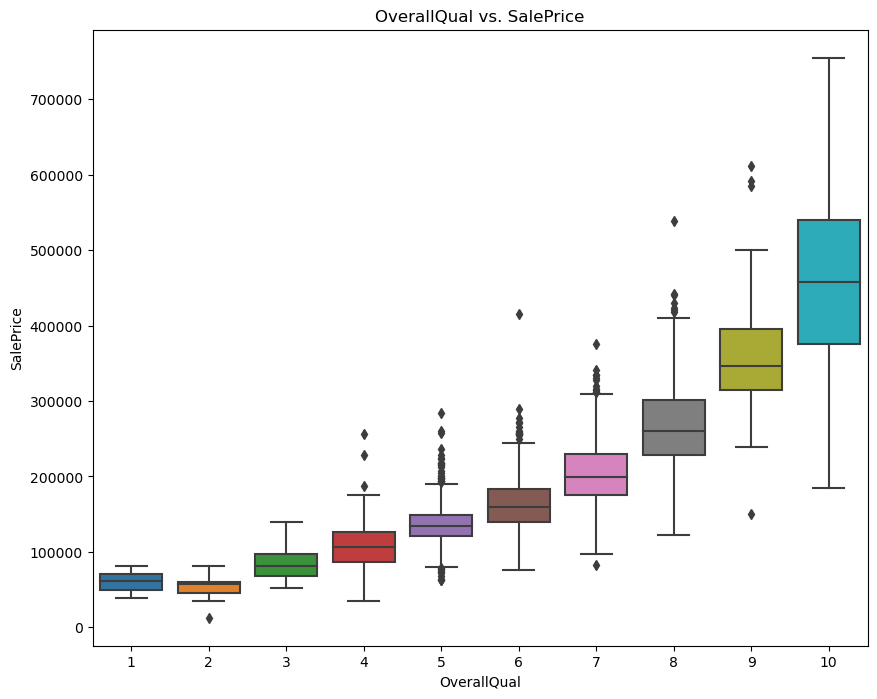

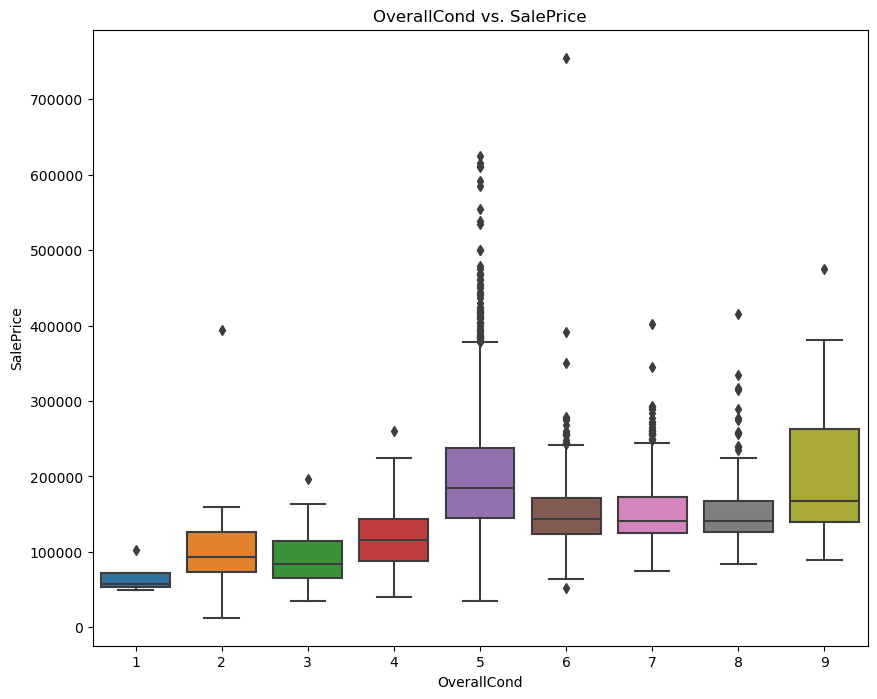

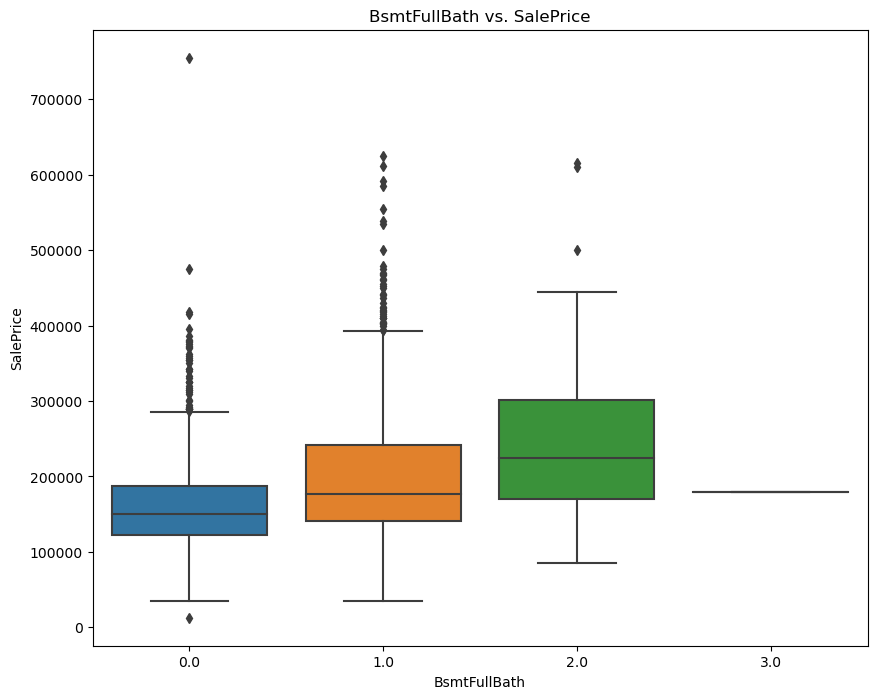

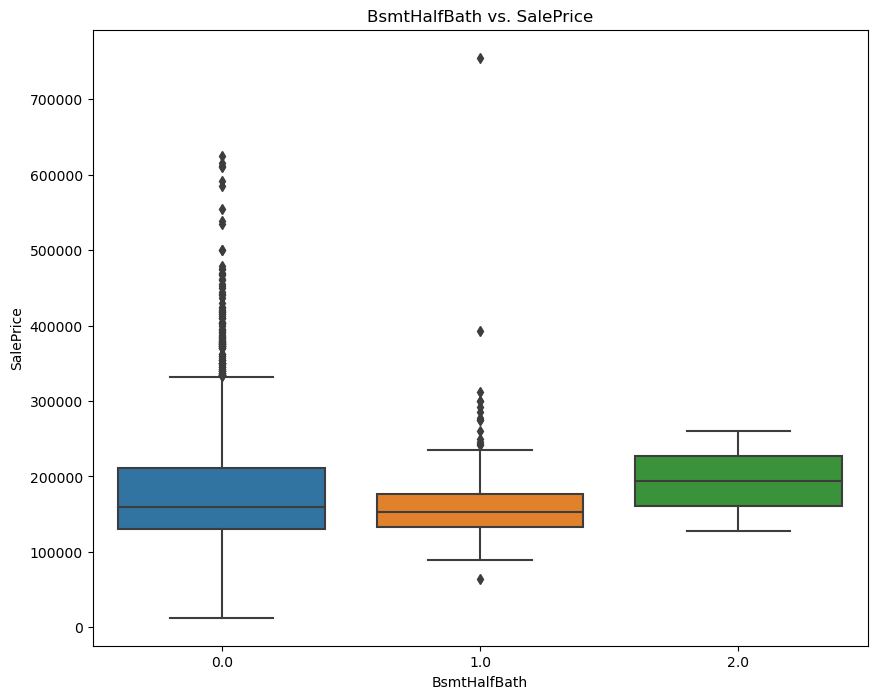

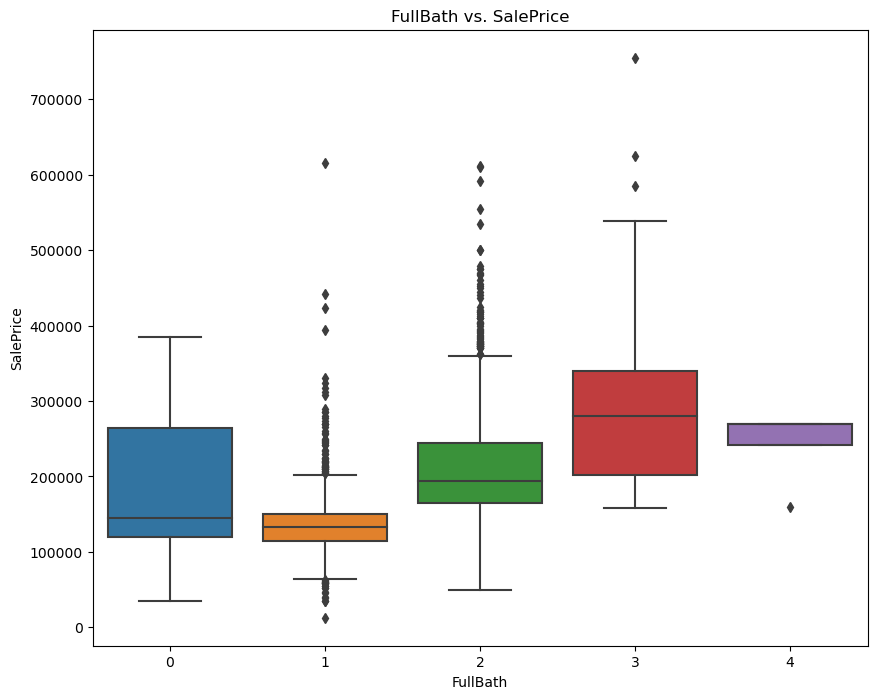

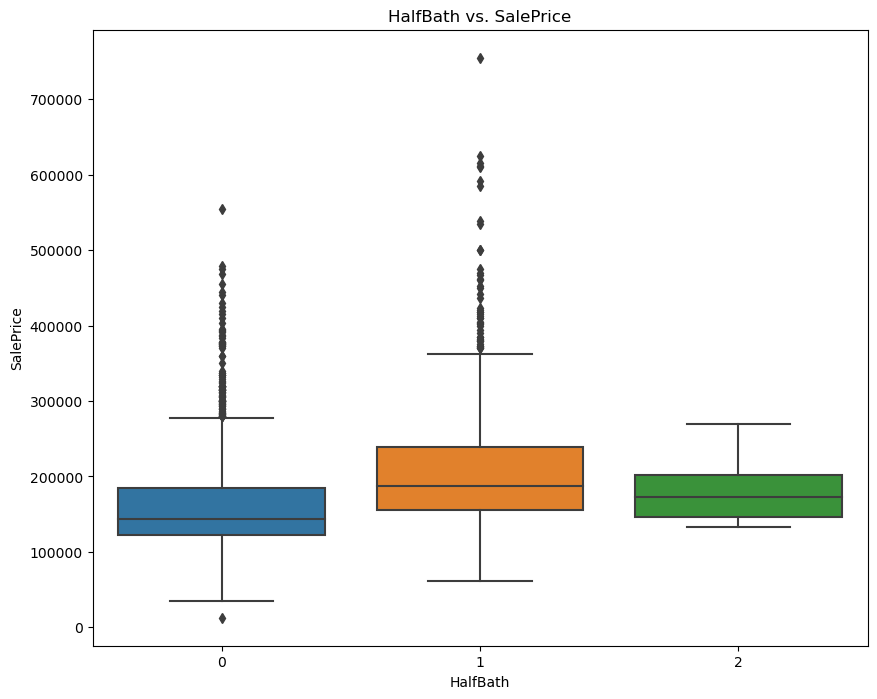

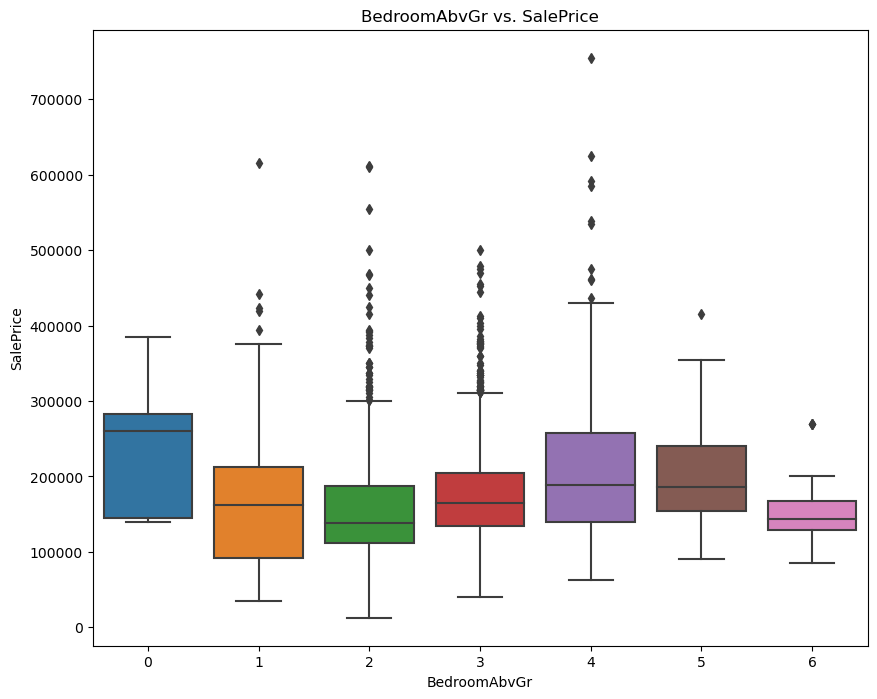

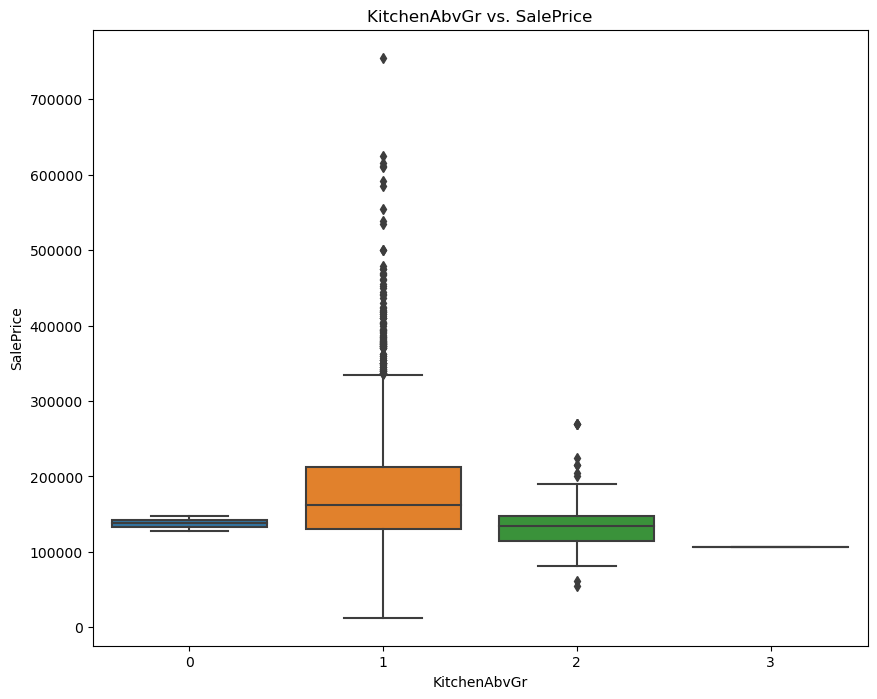

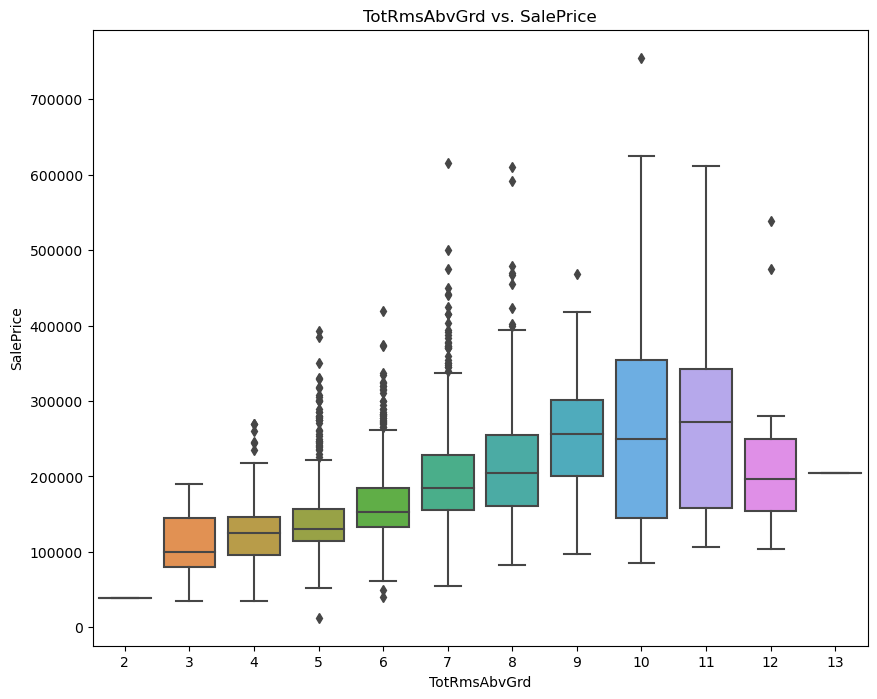

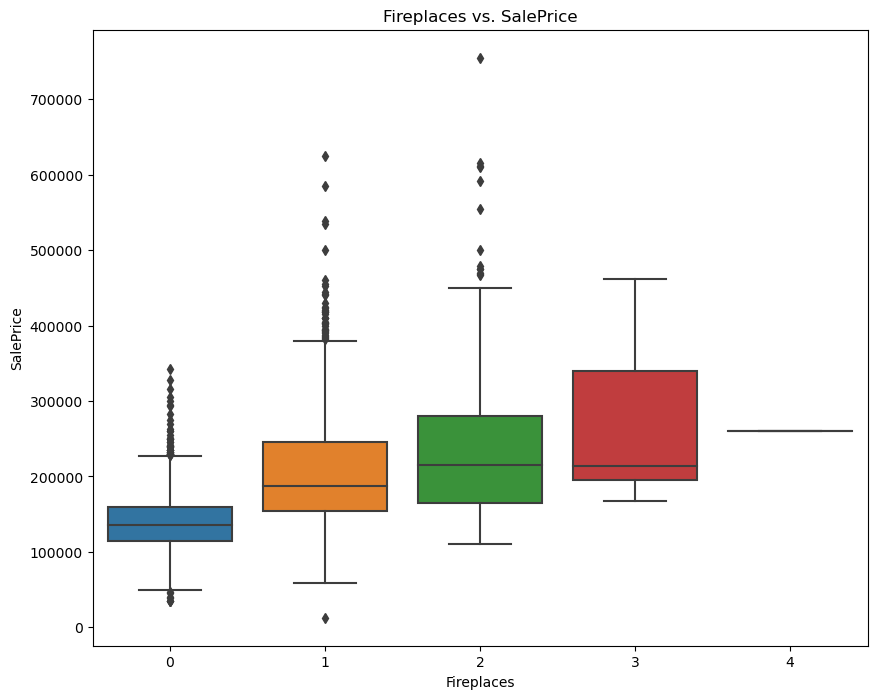

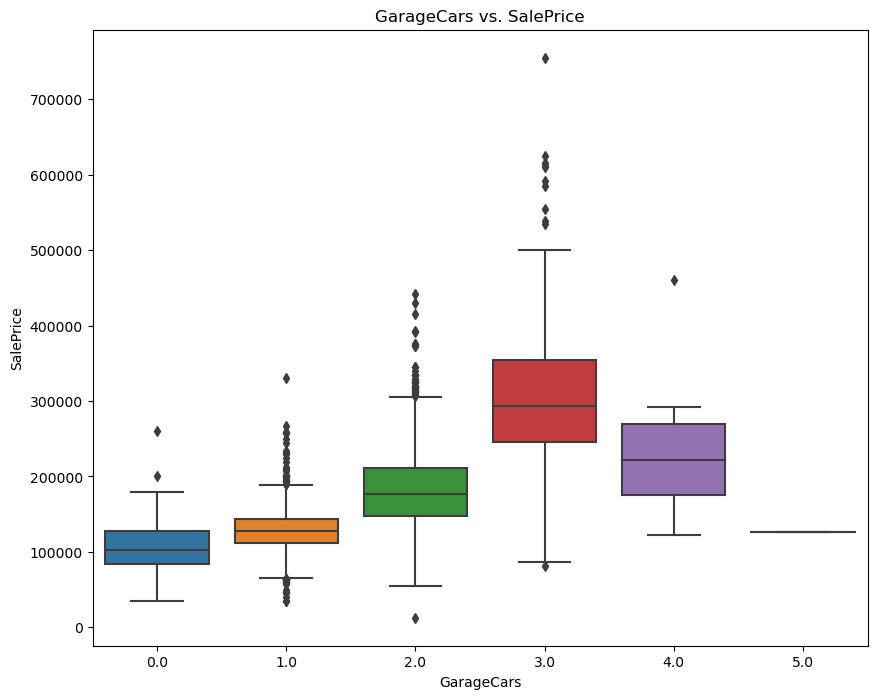

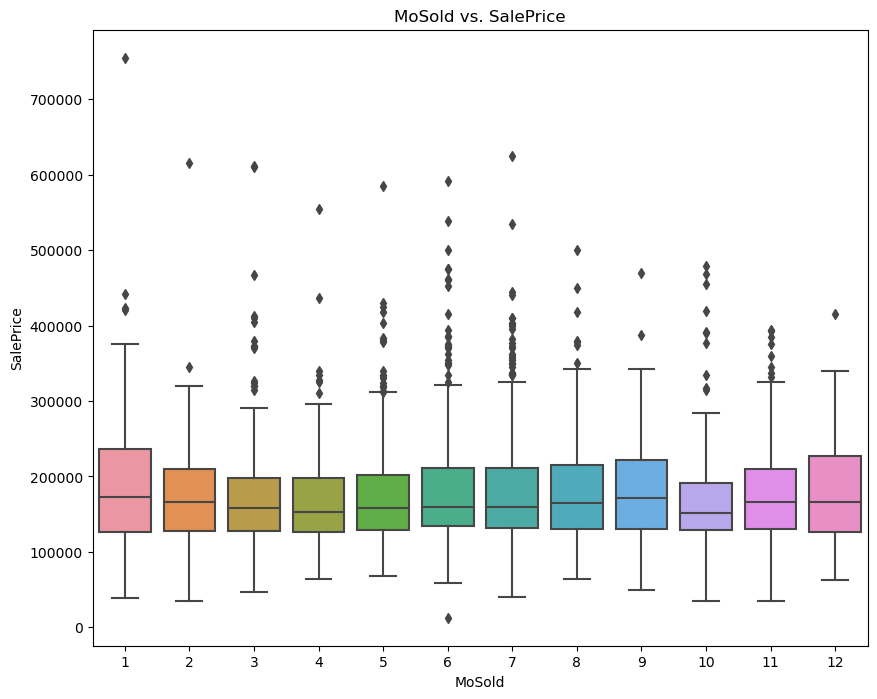

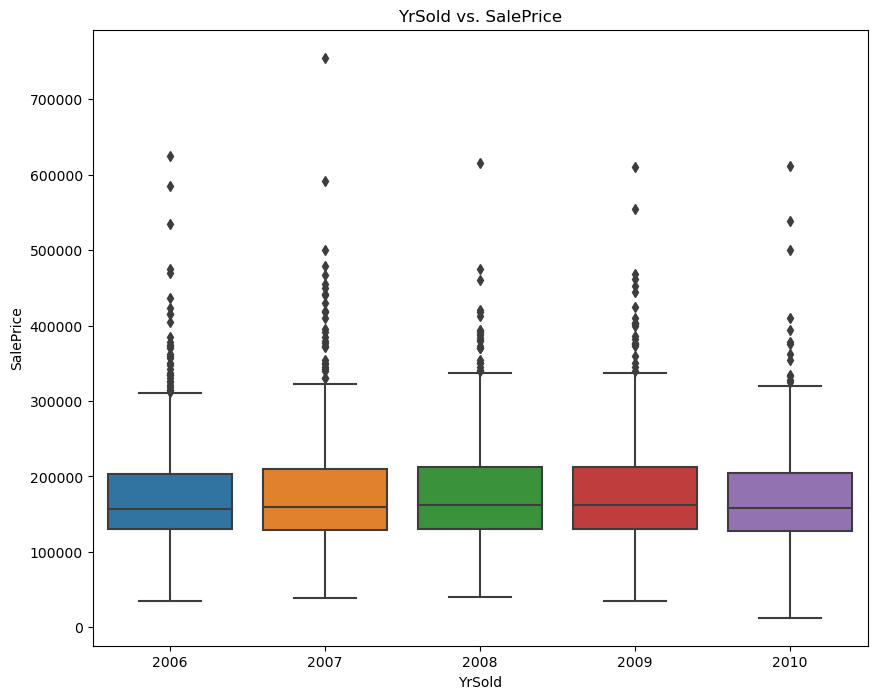

In [20]:
for i, feature in enumerate(housing_num_cat.columns):
        plt.figure(figsize=(10, 8))
        sns.boxplot(data=housing, x=feature, y='SalePrice')
        plt.title(f'{feature} vs. SalePrice')
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

<Axes: >

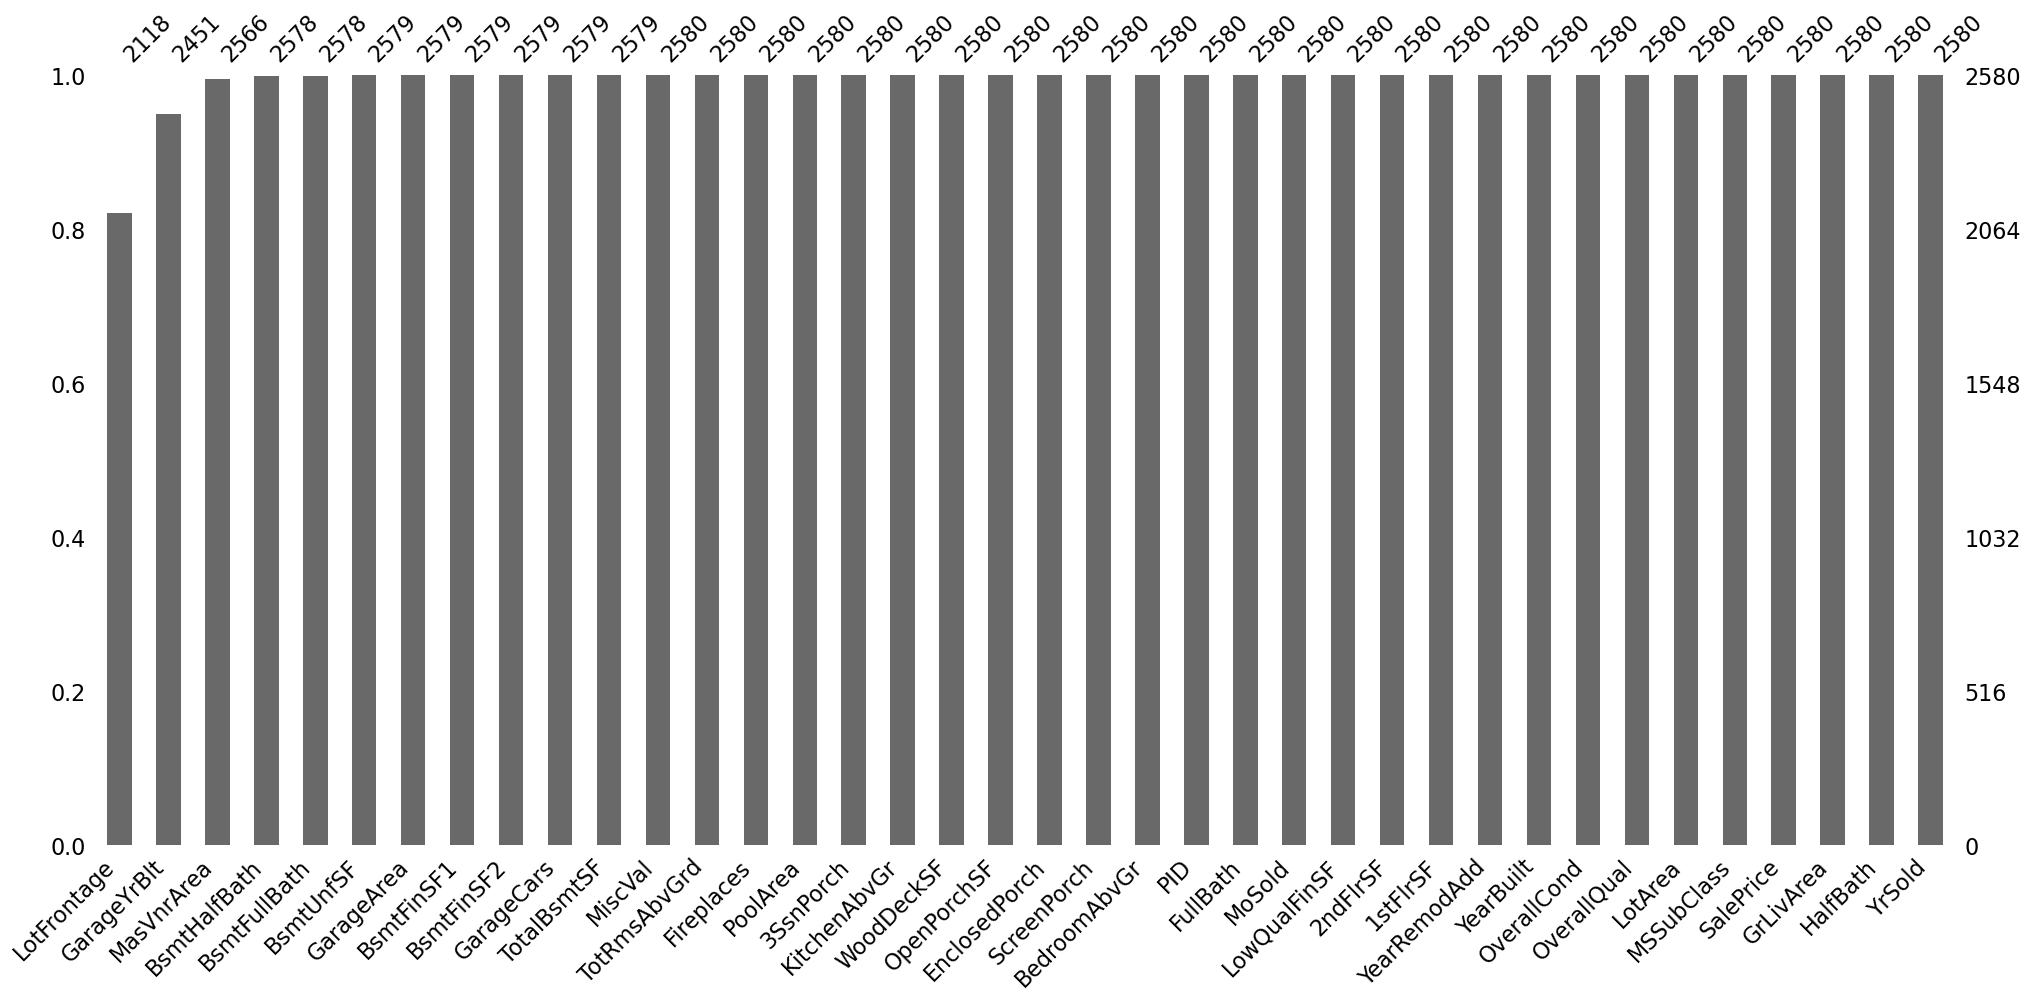

In [4]:
housing_num = housing.select_dtypes(['int64','float64']).copy()
msno.bar(housing_num, sort = 'ascending')